**Transactions Data** :

**Data Cleaning Techniques Employed**


**Converting Datetypes**

Converted PURCHASE_DATE and SCAN_DATE to datetime format

Convert BARCODE Column from float to String

**Cleaning the FINAL_QUANTITY Column**

Replaced "zero" string values with 0.

Used errors="coerce" to handle non-numeric values by converting them to NaN instead of raising errors.

**Eliminating duplicate rows**

Check data in products dataframe and just keep the first occurence and delete the rest of the duplicates

**Identified object (string) columns and applied standardization:**

Trimmed spaces.

Converted values to lowercase for consistency.


In [13]:
import pandas as pd

# First upload all the three CSV Files into local upload section while running in Google colab and then run the following code.
# Read the TRANSACTION_TAKEHOME CSV file into dataframe using Pandas
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")

# Display the DataFrame
print(transactions.head())

                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.49  
4  4.790050e+10       

In [14]:
#checking number of nulls in transactions
transactions.isnull().sum()

,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,0
FINAL_SALE,0


Here we see that there are nulls in final_sale column, but it is not counted as null in the transactions.isnull().sum(). So lets normalise and convert spaces into nulls to count them as nulls

In [15]:
#Treating spaces as na_values or nulls
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv",na_values=['', ' '])
transactions.isnull().sum()


,0
RECEIPT_ID,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
BARCODE,5762
FINAL_QUANTITY,0
FINAL_SALE,12500


<ipython-input-16-092768554420>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")


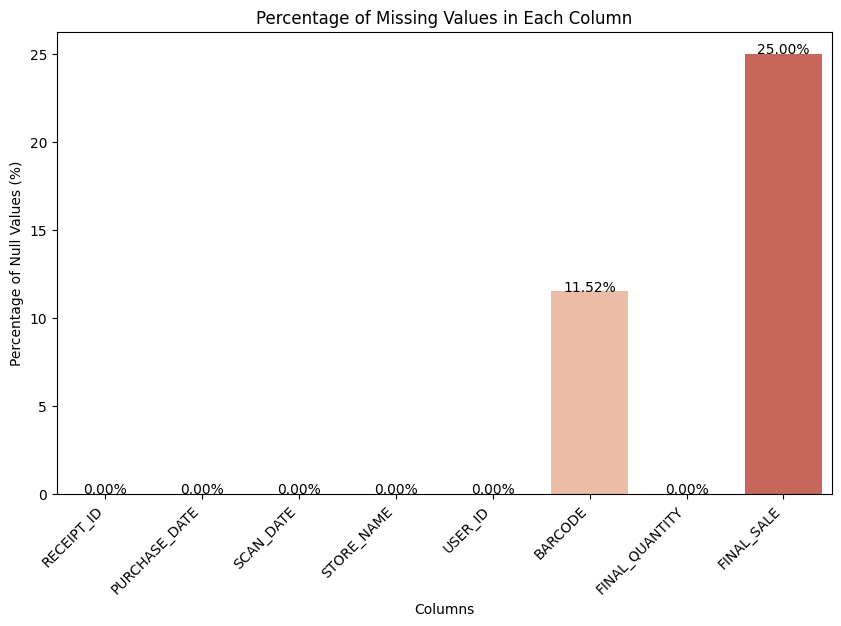

In [16]:
# Calculate the percentage of null values in each column
null_percentage = (transactions.isnull().sum() / len(transactions)) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel("Percentage of Null Values (%)")
plt.xlabel("Columns")
plt.title("Percentage of Missing Values in Each Column")

# Show the values on top of bars
for index, value in enumerate(null_percentage):
    plt.text(index, value, f"{value:.2f}%", ha='center', fontsize=10)

# Display the plot
plt.show()

In [5]:
# Display data types of each column
print(transactions.dtypes)

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE        float64
dtype: object


In [6]:
#Convert Barcode to string format
# Initialize an empty list to store transformed values
new_barcodes = []

# Loop through each value in the 'BARCODE' column
for x in transactions['BARCODE']:
    if pd.notna(x):  # Check if the value is not NaN
        new_barcodes.append(str(int(float(x))))  # Convert to float, then int, then string
    else:
        new_barcodes.append(pd.NA)  # Handle NaN by replacing with an empty string

# Assign the transformed values back to the DataFrame
transactions['BARCODE'] = new_barcodes

# Check changes in BARCODE
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.00,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,<NA>,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751,1.00,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.00,NaN


In [7]:
#Convert the value in Final Quantity from "Zero" to 0
transactions["FINAL_QUANTITY"] = transactions["FINAL_QUANTITY"].apply(lambda x: 0 if x == 'zero' else x)
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.00,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,<NA>,0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,78742229751,1.00,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.00,NaN


In [8]:
print(transactions.dtypes)

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE            object
FINAL_QUANTITY     object
FINAL_SALE        float64
dtype: object


In [9]:
# Convert data types
transactions["RECEIPT_ID"] = transactions["RECEIPT_ID"].astype(str)  # Convert to string
transactions["PURCHASE_DATE"] = pd.to_datetime(transactions["PURCHASE_DATE"], errors="coerce")  # Convert to datetime
transactions["SCAN_DATE"] = pd.to_datetime(transactions["SCAN_DATE"], errors="coerce")  # Convert to datetime with UTC
transactions["STORE_NAME"] = transactions["STORE_NAME"].astype(str)  # Convert to string
transactions["USER_ID"] = transactions["USER_ID"].astype(str)  # Convert to string
transactions["FINAL_QUANTITY"] = pd.to_numeric(transactions["FINAL_QUANTITY"], errors="coerce") # Convert to integer
transactions["FINAL_SALE"] = pd.to_numeric(transactions["FINAL_SALE"], errors="coerce")  # Convert to float

# Check updated data types
print(transactions.dtypes)

RECEIPT_ID                     object
PURCHASE_DATE          datetime64[ns]
SCAN_DATE         datetime64[ns, UTC]
STORE_NAME                     object
USER_ID                        object
BARCODE                        object
FINAL_QUANTITY                float64
FINAL_SALE                    float64
dtype: object


In [10]:
# Remove timezone from SCAN_DATE for loading into SQL server purposes
transactions["SCAN_DATE"] = transactions["SCAN_DATE"].dt.tz_localize(None)

In [11]:
print(transactions.dtypes)

RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE         datetime64[ns]
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY           float64
FINAL_SALE               float64
dtype: object


In [12]:
#checking if the process of datatype conversion is effecting nulls.
transactions['BARCODE'].isnull().sum()
#since there is no change in the nulls, good to go!!

5762

In [13]:
 #Check duplicate values in transactions data
transactions[transactions.duplicated()] #we see 171 record are duplicated.


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2724,1c12bd8a-c68c-41ee-a26d-294021d3e0b8,2024-09-07,2024-09-07 15:44:35.241,CVS,65af09757050d0a6206ab136,<NA>,1.0,NaN
4192,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935,WALMART,663140f9b7b24d45d938f3be,24000048336,1.0,NaN
6572,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,12000504051,1.0,NaN
6623,43955b35-6fbc-4909-a4de-1a0de0dc387f,2024-09-06,2024-09-08 18:32:30.031,WALMART,625364ddda4fb11c8a9fcb85,371687660147,0.0,12.97
7675,4ec870d2-c39f-4a40-bf8a-26a079409b20,2024-09-08,2024-09-08 19:39:01.589,WALMART,638e9ae602a4e512e0585b59,72392016358,0.0,1.48
...,...,...,...,...,...,...,...,...
49651,93f45c94-af38-42d4-a3fe-eb9d5b24efbb,2024-09-03,2024-09-08 12:20:50.611,PUBLIX,660a0ce6828f877fdee915a1,<NA>,1.0,4.40
49660,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073,PUBLIX,60cff0e7e265b446d62200b2,41780271808,1.0,4.79
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835,WALMART,614e733372ba844aa8dc345e,41789001215,1.0,0.52
49911,874a8116-3342-4b4a-9d24-4666e0ab1052,2024-08-31,2024-08-31 22:41:03.829,CVS,63a4ef6bb5f32149b9d86e66,<NA>,1.0,3.00


In [14]:
#Lets remove duplicated records by just keeping first record of the duplicates
transactions = transactions.drop_duplicates(keep="first")

 #check if duplicates are eliminated:
transactions[transactions.duplicated()]


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE


In [ ]:
#Checking the length of columns to insert data into SQL Server for schema creation
max_length = transactions["STORE_NAME"].str.len().max()
print(f"Maximum length of STORE_NAME column: {max_length}")


Maximum length of STORE_NAME column: 66


In [ ]:

# Now, save it to Excel for next process
transactions.to_excel("TRANSACTION.xlsx", index=False, engine="openpyxl")

print("Excel file 'TRANSACTION.xlsx' created successfully!")


Excel file 'TRANSACTION.xlsx' created successfully!


**Users data:**

**Data Cleaning Techniques Employed:**

**Converting Data Types**

Converted CREATED_DATE and BIRTH_DATE to datetime format

**Cleaning Gender Column**

Writing  a function (**clean_gender**) to clean Gender column and map duplicates or wrongly spelled values to a single column

**Stripping and standardising string columns**

Eliminating spaces,converting STATE, LANGUAGE into lower case

In [20]:
# Read the USERS_TAKEHOME CSV file into dataframe using Pandas
user = pd.read_csv("USER_TAKEHOME.csv",na_values=['', ' '])


# Display the DataFrame
print(user.head())

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [21]:
#check null  values in all the columns
user.isnull().sum()

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,5892


<ipython-input-22-0f2cdbd88a59>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")


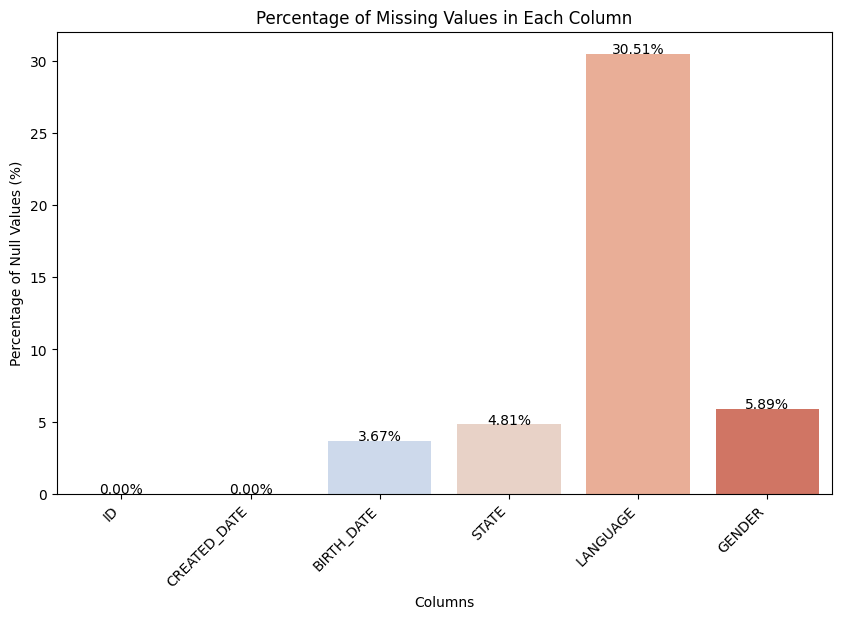

In [22]:
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of null values in each column
null_percentage = (user.isnull().sum() / len(user)) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel("Percentage of Null Values (%)")
plt.xlabel("Columns")
plt.title("Percentage of Missing Values in Each Column")

# Show the values on top of bars
for index, value in enumerate(null_percentage):
    plt.text(index, value, f"{value:.2f}%", ha='center', fontsize=10)

# Display the plot
plt.show()

In [23]:
#Check the datatypes of the columns in dataframe
print(user.dtypes)

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


In [24]:
# Convert data types of Date columns which are displayed as objects into datetimes

user["CREATED_DATE"] = pd.to_datetime(user["CREATED_DATE"], errors="coerce")  # Convert to datetime
user["BIRTH_DATE"] = pd.to_datetime(user["BIRTH_DATE"], errors="coerce")  # Convert to datetime with UTC



# Check updated data types
print(user.dtypes)

ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE      datetime64[ns, UTC]
STATE                        object
LANGUAGE                     object
GENDER                       object
dtype: object


In [25]:
# Remove timezone from SCAN_DATE for loading into SQL Server purposes
user["CREATED_DATE"] = user["CREATED_DATE"].dt.tz_localize(None)
user["BIRTH_DATE"] = user["BIRTH_DATE"].dt.tz_localize(None)
print(user.dtypes)

ID                      object
CREATED_DATE    datetime64[ns]
BIRTH_DATE      datetime64[ns]
STATE                   object
LANGUAGE                object
GENDER                  object
dtype: object


In [26]:
#Check values in Gneder column
gender_counts = user["GENDER"].value_counts()
print(gender_counts)

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


In [27]:
#Cleaning Gender Column
def clean_gender(value):
    if pd.isna(value) or value.lower().strip() in ["not_specified", "not_listed", "my gender isn't listed"]:
        return "unknown"
    elif value.lower().strip() in ["non-binary", "non--binary", "non_binary", "nonbinary", "Non-Binary"]:
        return "non_binary"
    elif value.lower().strip() in ["prefer not to say", "Prefer not to say"]:
        return "prefer_not_to_say"
    else:
        return value.lower().strip()  # Standardize remaining values to lowercase

# Apply function to GENDER column
user["GENDER"] = user["GENDER"].apply(clean_gender)

# Check unique values after cleaning
print(user["GENDER"].value_counts())

GENDER
female               64240
male                 25829
unknown               6301
transgender           1772
prefer_not_to_say     1351
non_binary             507
Name: count, dtype: int64


In [22]:
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,NaT,NC,en,unknown
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female


In [28]:
user["STATE"] = user["STATE"].str.strip().str.upper()
user["LANGUAGE"] = user["LANGUAGE"].str.strip().str.lower()


In [29]:
user.isnull().sum()

,0
ID,0
CREATED_DATE,0
BIRTH_DATE,3675
STATE,4812
LANGUAGE,30508
GENDER,0


In [25]:
#To check if the states are valid or not
state_counts = user["STATE"].value_counts()
print(state_counts)
#Seems to be all US States and looks fine

STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: count, dtype: int64


In [26]:
user.shape[0]

100000

In [30]:
#To check if there are valid date of births. We see that min_birth_date is 1900 which is weird
max_birth_date = user["BIRTH_DATE"].max()
print(max_birth_date)
min_birth_date = user["BIRTH_DATE"].min()
print(min_birth_date)
null_birth_dates = user["BIRTH_DATE"].isna().sum()
print(null_birth_dates)

2022-04-03 07:00:00
1900-01-01 00:00:00
3675


In [33]:
user["BIRTH_YEAR"] = user["BIRTH_DATE"].dt.year

# Count USER_IDs per birth year
birth_year_counts = user.groupby("BIRTH_YEAR")["ID"].count().reset_index()

# Rename columns
birth_year_counts.columns = ["BIRTH_YEAR", "USER_COUNT"]

#print(birth_year_counts)

def categorize_generation(year):
    if 1900 <= year <= 1960:
        return "1900-1960 (Older Generation)"
    elif 1961 <= year <= 1980:
        return "1961-1980 (Gen X)"
    elif 1981 <= year <= 1996:
        return "1981-1996 (Millennials)"
    elif 1997 <= year <= 2012:
        return "1997-2012 (Gen Z)"
    else:
        return "2013+ (Gen Alpha)"

# Apply generation categorization
user["GENERATION"] = user["BIRTH_YEAR"].apply(categorize_generation)

# Count users in each generation
generation_counts = user.groupby("GENERATION")["ID"].count().reset_index()

# Rename columns
generation_counts.columns = ["GENERATION", "USER_COUNT"]

print(generation_counts)

                     GENERATION  USER_COUNT
0  1900-1960 (Older Generation)        7614
1             1961-1980 (Gen X)       28849
2       1981-1996 (Millennials)       33758
3             1997-2012 (Gen Z)       26077
4             2013+ (Gen Alpha)        3702


In [ ]:
#Check if there are multiple users with same date of birth. We see only 2 user id's , so doesnt effect the analysis much
count_min_birth_date = (user["BIRTH_DATE"] == min_birth_date).sum()
print(count_min_birth_date)

2


In [ ]:
# Now, save it to Excel for next process
user.to_excel("USERS.xlsx", index=False)

**Products Data:**

**Data Cleaning Techniques Employed:**

**Converting Data Types**

Converted BARCODE from float to String format

**Eliminating duplicate rows**

Check data in products dataframe and just keep the first occurence and delete the rest of the duplicates

**Stripping and standardising string columns**

Eliminating spaces,converting CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND into lower case



In [2]:
import pandas as pd
# Read the PRODUCTS_TAKEHOME CSV file into dataframe using Pandas
products = pd.read_csv("PRODUCTS_TAKEHOME.csv",na_values=['', ' '])  # Ensure correct engine

# Display the DataFrame
print(products.head())

          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELECSOP  4.618178e

In [3]:
#check null values in all the columns
products.isnull().sum()

,0
CATEGORY_1,111
CATEGORY_2,1424
CATEGORY_3,60566
CATEGORY_4,778093
MANUFACTURER,226474
BRAND,226472
BARCODE,4025


In [17]:
#Checking for vaklues in Manufacturer and Brand columns
manufacturer_counts = products["MANUFACTURER"].value_counts()
print(manufacturer_counts)

MANUFACTURER
PLACEHOLDER MANUFACTURER             86902
PROCTER & GAMBLE                     21065
REM MANUFACTURER                     20813
UNILEVER                             16864
L'OREAL                              16699
                                     ...  
INNO FOODS, INC.                         1
FLOWERWOOD NURSERY, INC.                 1
PROGRESSIVE INTERNATIONAL CORP.          1
LEVINSOHN TEXTILE COMPANY                1
OUTDOOR PRODUCT INNOVATIONS, INC.        1
Name: count, Length: 4354, dtype: int64


In [18]:
Brand_counts = products["BRAND"].value_counts()
print(Brand_counts)

BRAND
REM BRAND          20813
BRAND NOT KNOWN    17025
PRIVATE LABEL      13467
CVS                 6400
SEGO                4831
                   ...  
ALAGA                  1
A PINATA 4 U           1
SQWINCHER              1
MOSISO                 1
GATEWAY                1
Name: count, Length: 8122, dtype: int64


We see that there are 86902 Placeholder Mnaufacturers and 17025 Not Knows Brands which are not useful in analysis and is a very big data quality issue


Lets display it in visualisation for better understanding

<ipython-input-5-422d117e96ad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")


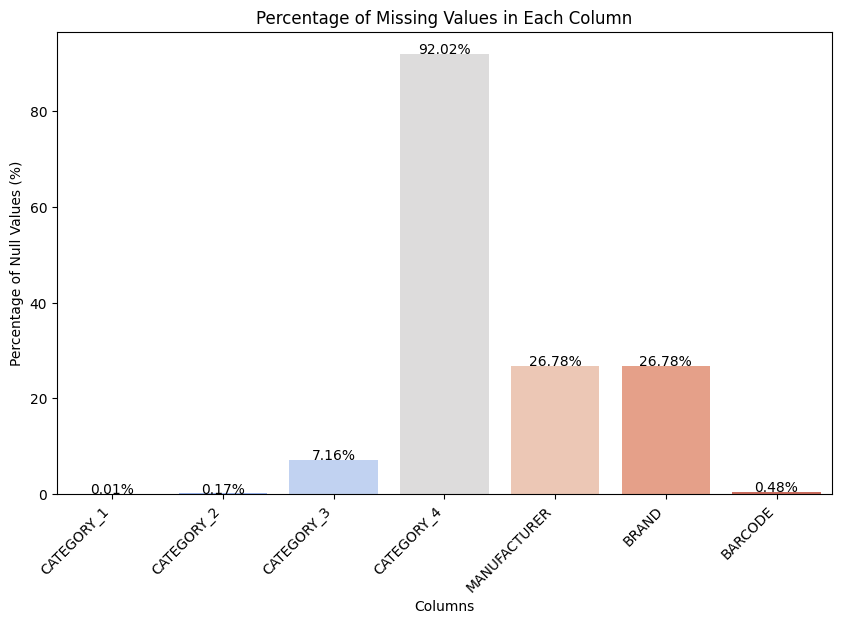

In [5]:
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of null values in each column
null_percentage = (products.isnull().sum() / len(products)) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="coolwarm")

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel("Percentage of Null Values (%)")
plt.xlabel("Columns")
plt.title("Percentage of Missing Values in Each Column")

# Show the values on top of bars
for index, value in enumerate(null_percentage):
    plt.text(index, value, f"{value:.2f}%", ha='center', fontsize=10)

# Display the plot
plt.show()


In [35]:
#Check Datatypes of columns in the products dataframe
print(products.dtypes)

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object


In [36]:
# Convert data types
# Initialize an empty list to store transformed values
new_barcodes = []

# Loop through each value in the 'BARCODE' column
for x in products['BARCODE']:
    if pd.notna(x):  # Check if the value is not NaN
        new_barcodes.append(str(int(float(x))))  # Convert to float, then int, then string
    else:
        new_barcodes.append(pd.NA)  # Handle NaN by replacing with an empty string

# Assign the transformed values back to the DataFrame
products['BARCODE'] = new_barcodes

# Check changes in BARCODE
products.head()


# Check updated data types
#print(products.dtypes)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


In [37]:
 #products duplicate records
 products[products.duplicated()]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811
91710,Health & Wellness,Skin Care,NaN,NaN,"BEIERSDORF, INC.",COPPERTONE,<NA>
100470,Snacks,Candy,Confection Candy,NaN,"LIDL US, LLC",LIDL,20744731
109639,Restaurant,Beverages,Soda,Diet Soda,PEPSICO,PEPSI,<NA>
...,...,...,...,...,...,...,...
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905
833620,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,<NA>
834874,Snacks,Nuts & Seeds,Peanuts,NaN,NaN,NaN,3415207
838643,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3473108


In [38]:
# Drop exact duplicates (keep first occurrence)
products = products.drop_duplicates(keep="first")

In [39]:
#check if duplicates are eliminated:
products[products.duplicated()]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE


In [ ]:
# Now, save it to Excel for next process
products.to_excel("PRODUCTS.xlsx", index=False)

In [ ]:
#check how many barcodes are common in both transactions and products dataframes for analysis of business questions
matching_values = transactions[transactions['BARCODE'].isin(products['BARCODE'])]['BARCODE']
print(matching_values)

0         15300014978
1                <NA>
5        681131411295
7         78300069942
9                <NA>
             ...     
49993     85239042663
49994            <NA>
49996     46100400555
49997    646630019670
49999    307660745853
Name: BARCODE, Length: 30509, dtype: object


In [ ]:
#putting the matching values in a dataframe
df=pd.DataFrame(matching_values)

In [ ]:
#count of common or joined barcodes
df['BARCODE'].nunique()

6562

In [ ]:
transactions['BARCODE'].nunique()

11027

In [40]:
products['BARCODE'].nunique()

841342

Out of those 841342 barcodes, we see that only 6562  barcodes have their transactions in the Transactions table.Since this is the joining column between Products and Transactions Table we cannot get accurate results or analysis for the misssing barcodes in the products table. This is a lot more bigger problem than expected as we will get skewed results.

In [27]:
#check how many user id's are common in both transactions and users dataframes for analysis of business questions
matching_values = transactions[transactions['USER_ID'].isin(user['ID'])]['USER_ID']
print(matching_values)

38       62e5a95ca6565cf0534c989c
63       610a8541ca1fab5b417b5d33
151      646bdaa67a342372c857b958
152      646bdaa67a342372c857b958
264      647281efa55bb77a0e26f586
                   ...           
48172    5e6d0beb01ecdd13986852e8
48176    64dd9170516348066e7c4006
48691    64ce5d823cb069b5eac9b700
49334    5fbd58f1ad6b5e12a114079a
49556    65044dc5fe41d365c2ed7d71
Name: USER_ID, Length: 261, dtype: object


In [28]:
#putting the matching values in a dataframe
df_userid=pd.DataFrame(matching_values)

In [30]:
#count of common or joined users
df_userid['USER_ID'].nunique()

91

In [31]:
user['ID'].nunique()

100000

Out of 100000 unique users, only 91 users have transactions in transactions table which is not even 1% of given data. So the analysis might be skewed. For better understanding and accurate results need to get bigger sample of data